## Exercise 1

b = 2.620538882402765
a = 444.1773573243596


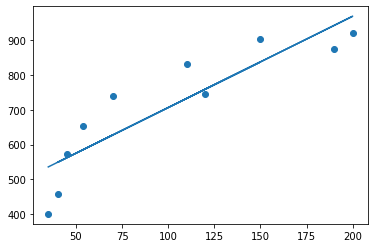

In [1]:
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

X = zp
y = ks

b = (np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)
print('b = {}'.format(b))

a = np.mean(y)-b*np.mean(X)
print('a = {}'.format(a))

plt.scatter(X,y)
plt.plot(X, 444.177 + 2.62*X)

B = [[5.88982042]]


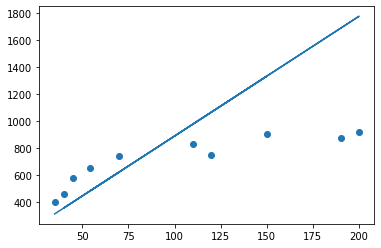

In [2]:
X = zp
y = ks

X = X.reshape((-1,1))
y = y.reshape((-1,1))

B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T@y)
print('B = {}'.format(B))

plt.scatter(X,y)
plt.plot(X, 8.88*X)

## Exercise 2

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 700, B1=5.889820402076462, mse=56516.85841571941
Iteration: 800, B1=5.88982041902807, mse=56516.8584157194
Iteration: 900, B1=5.889820420065112, mse=56516.85841571941


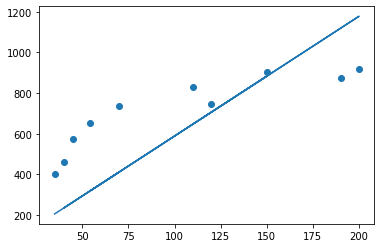

In [3]:
X = zp
y = ks

def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n

alpha = 1e-6

B1 = 0.1

n = 10

for i in range(1000):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%100==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))
        
plt.scatter(X,y)
plt.plot(X, B1*X)

## Exercise 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, в каких - таблица критических точек распределения Стьюдента?

Если sigma известна, то Лапласа.
Если не известна, то Стьюдента.

## Exercise 4

Iteration: 0, B0=0.10137904, B1=0.356752200330688, mse=478148.7242566215
Iteration: 1000, B0=0.36730105200073515, B1=5.8871754591747285, mse=56434.123442708355
Iteration: 2000, B0=0.5923902248252618, B1=5.885518704189587, mse=56383.45564954148
Iteration: 3000, B0=0.8173652381461446, B1=5.883862789464383, mse=56332.839238173525
Iteration: 4000, B0=1.0422261498622092, B1=5.882207714577013, mse=56282.274156498745
Iteration: 5000, B0=1.2669730178428882, B1=5.88055347910153, mse=56231.76035246404
Iteration: 6000, B0=1.4916058999282649, B1=5.8789000826122075, mse=56181.297774069164
Iteration: 7000, B0=1.7161248539290892, B1=5.877247524683534, mse=56130.88636936662
Iteration: 8000, B0=1.9405299376267835, B1=5.875595804890209, mse=56080.52608646159
Iteration: 9000, B0=2.1648212087734735, B1=5.873944922807155, mse=56030.21687351186


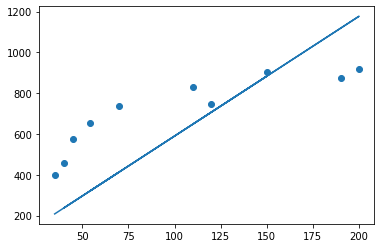

In [4]:
X = zp
y = ks

def mse_(B0, B1, X=X, y=y, n=10):
    return np.sum((B0 + B1*X-y)**2)/n

alpha = 1e-6

B0 = 0.1
B1 = 0.2

n = 10

for i in range(10000):
    B0 -= alpha * (2/n)*np.sum((B0+B1*X-y))
    B1 -= alpha * (2/n)*np.sum((B0+B1*X-y)*X)
    if i%1000==0:
        print('Iteration: {i}, B0={B0}, B1={B1}, mse={mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B0,B1)))
        
plt.scatter(X,y)
plt.plot(X, B0+B1*X)